<a href="https://colab.research.google.com/github/moripova/Data-Science-Projects/blob/main/Full_Code_Project_7_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1> 
<h1><center>Unsupervised Learning:Case Study/Full Code</center></h1>
<h1><center>Mavluda Oripova </center></h1>

---
---


**Marks: 60**

<center><img src="https://blog.tipranks.com/wp-content/uploads/2022/10/shutterstock_1086295871-750x406.jpg" width="1000" height="500"></center>

<b><h1><center> Trade&Ahead Project </center></h2></b>


## **Business Context**

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## **Objective**
Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## **Data Dictionary**
- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Security: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

# **Importing necessary libraries and data**

---



In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Since we are using Google Colab, we will be connecting our notebook to the google drive where our data sets are located:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#We will load the data sets to the notebook- df for training and tuning; df_test for testing the performance 
df=pd.read_csv("/content/drive/MyDrive/PYTHON/Unsupervised Learning/Week 1/project 7/stock_data.csv")


# **Data Overview**

---





The initial steps to get an overview of any dataset is to:

- get information about the number of rows and columns in the dataset
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
-find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
-and check the statistical summary of the dataset to get an overview of the numerical columns of the data


### <font color='darkred'>**Checking the shape of the dataset**</font>


In [ ]:
# First we will check the shape (number of rows and columns) in the data:
df.shape


(340, 15)

**Observations:**
- The data contains 340 rows and 15 columns.


In [ ]:
#Let's create copies of the data:
data=df.copy()


### <font color='darkred'>**Checking the first and last few rows of the dataset**</font>


In [ ]:
# let's view a sample of the data
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


**Observations**:
 - Based on the observed data we can see that it contains both numeric and object data types. There are some negative variables. The ticker symbol column does not have an interpretable data, so we can drop this column.

**We won't need Product_ID for analysis, so let's drop this column**

In [ ]:
df.drop("Ticker Symbol", axis=1, inplace=True)

### <font color='darkred'>**Checking the data types of the columns for the dataset**</font>


In [ ]:
# Checking the data types on the training dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Security                      340 non-null    object 
 1   GICS Sector                   340 non-null    object 
 2   GICS Sub Industry             340 non-null    object 
 3   Current Price                 340 non-null    float64
 4   Price Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash Ratio                    340 non-null    int64  
 8   Net Cash Flow                 340 non-null    int64  
 9   Net Income                    340 non-null    int64  
 10  Earnings Per Share            340 non-null    float64
 11  Estimated Shares Outstanding  340 non-null    float64
 12  P/E Ratio                     340 non-null    float64
 13  P/B R

**Observations:**
- There are 3 object types and 11 numeric data types. 

### <font color='darkred'>**Statistical summary of the dataset**</font>

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327936,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


**Observations:**

- The average stock price of the stocks is 80 dollars.The average **stock price change** in 13 weeks is **4.07 dollars**.  The average net income is 1494384602 dollars. 
- **American Airlines** is the most frequent company.
- Industrials is the top economic sector, and **Oil and Gas Exploration** is the top sub-industry with **104** unique companies/entries. 
- There are **11** industry sectors in the data.

### <font color='darkred'>**Checking for duplicate and missing values**</font>

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**Observations**:
- There are no duplicate nor missing values in the dataset.

# **Exploratory Data Analysis (EDA)**

---





- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.


## **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### <font color='darkred'>**Current Price**</font>

Sample Mean = 80.86234477216765
Sample Minimum = 4.5
Sample Maximum = 1274.949951


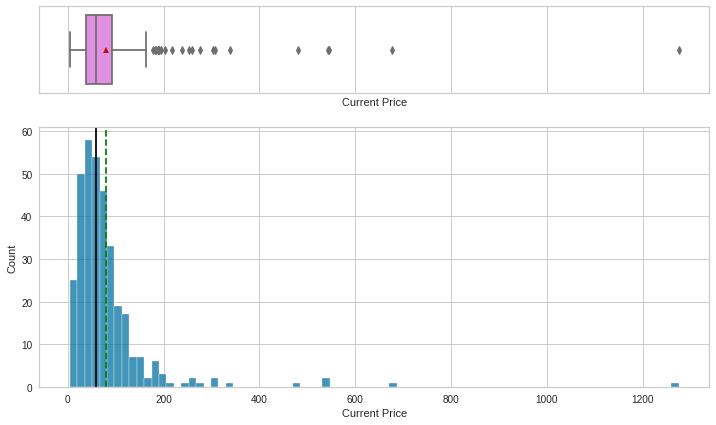

In [ ]:
histogram_boxplot(df, 'Current Price')
print('Sample Mean =',df['Current Price'].mean())
print('Sample Minimum =',df['Current Price'].min())
print('Sample Maximum =',df['Current Price'].max())
plt.show()

**Observations:**
- The Current Price data distribution is skewed to the rigth, with many outliers above the maximum price of 1274 dollars.

### <font color='darkred'>**Price Change**</font>

Sample Mean = 4.078193812467648
Sample Minimum = -47.12969338
Sample Maximum = 55.05168339


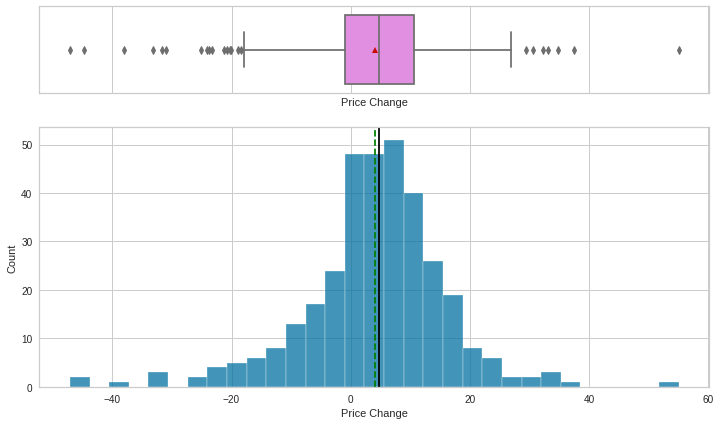

In [ ]:
histogram_boxplot(df, 'Price Change')
print('Sample Mean =',df['Price Change'].mean())
print('Sample Minimum =',df['Price Change'].min())
print('Sample Maximum =',df['Price Change'].max())
plt.show()

**Observations:**
 - The Price Change data is normally distributed with outliers below the minimum of -47 and the maximum of 55 dollars.

### <font color='darkred'>**Volatility**</font>

Sample Mean = 1.5259762538411765
Sample Minimum = 0.733163184
Sample Maximum = 4.58004173


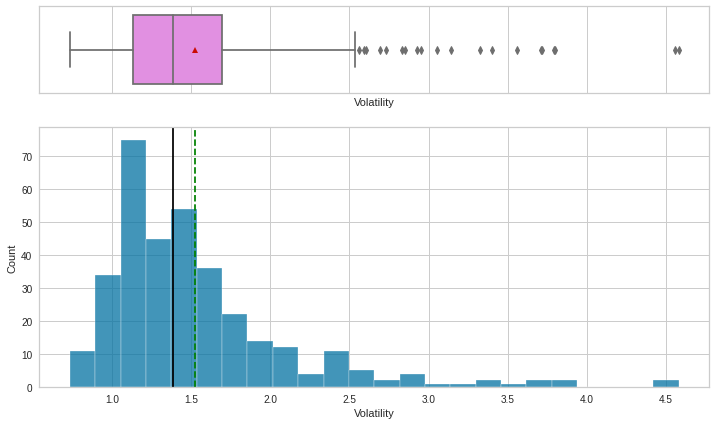

In [ ]:
histogram_boxplot(df, 'Volatility')
print('Sample Mean =',df['Volatility'].mean())
print('Sample Minimum =',df['Volatility'].min())
print('Sample Maximum =',df['Volatility'].max())
plt.show()

**Observations:**
- The votality data is a bit right skewed with the outliers above the maximum of 4.5


### <font color='darkred'>**ROE**</font>

Sample Mean = 39.59705882352941
Sample Minimum = 1
Sample Maximum = 917


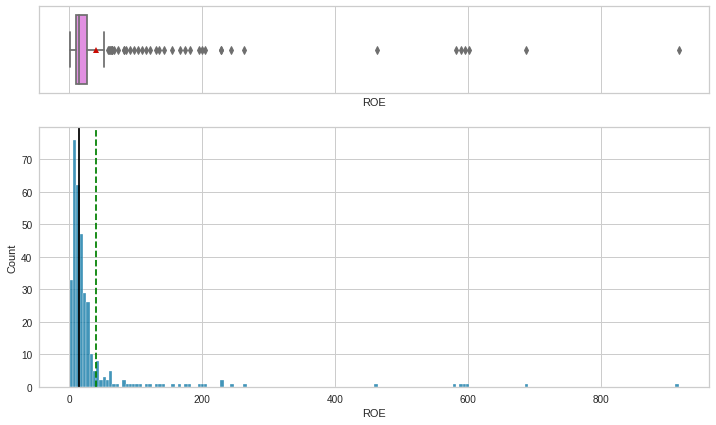

In [ ]:
histogram_boxplot(df, 'ROE')
print('Sample Mean =',df['ROE'].mean())
print('Sample Minimum =',df['ROE'].min())
print('Sample Maximum =',df['ROE'].max())
plt.show()

**Observations:**
 - The ROE data is a little right skewed and there are many outliers above the maximum level of 917

### <font color='darkred'>**Cash Ratio**</font>

Sample Mean = 70.02352941176471
Sample Minimum = 0
Sample Maximum = 958


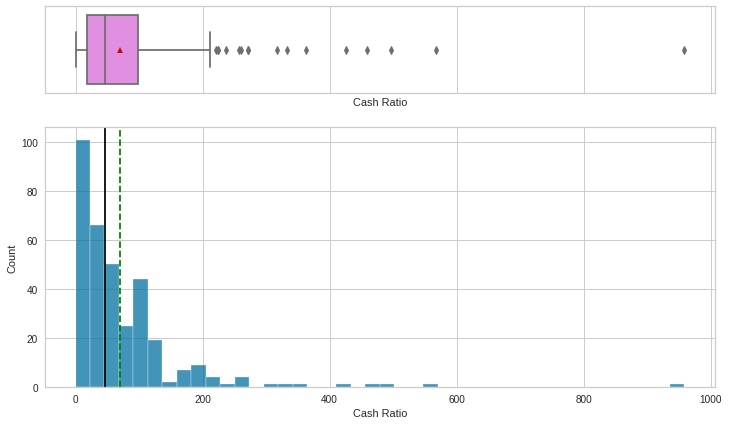

In [ ]:
histogram_boxplot(df, 'Cash Ratio')
print('Sample Mean =',df['Cash Ratio'].mean())
print('Sample Minimum =',df['Cash Ratio'].min())
print('Sample Maximum =',df['Cash Ratio'].max())
plt.show()

**Observations:** 
- Cash Ratio data is a bit right skewed and there are outliers on the right, above the maximum level of 958. 


### <font color='darkred'>**Net Cash Flow**</font>

Sample Mean = 55537620.5882353
Sample Minimum = -11208000000
Sample Maximum = 20764000000


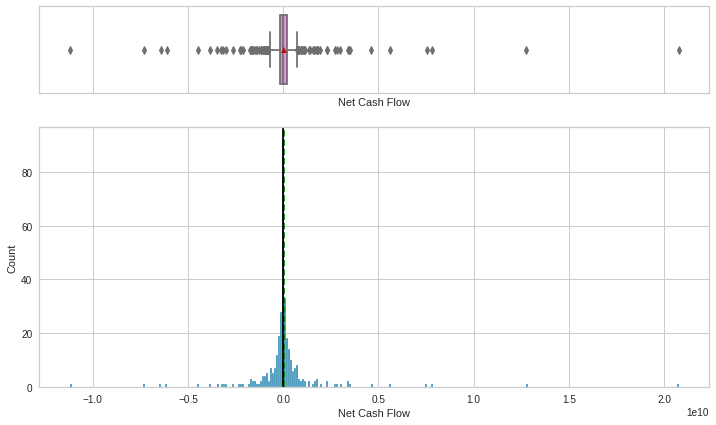

In [ ]:
histogram_boxplot(df, 'Net Cash Flow')
print('Sample Mean =',df['Net Cash Flow'].mean())
print('Sample Minimum =',df['Net Cash Flow'].min())
print('Sample Maximum =',df['Net Cash Flow'].max())
plt.show()

**Observations:**
- Net Cash data is normally distributed, but there are very many outliers on both sides.


### <font color='darkred'>**Net Income**</font>

Sample Mean = 1494384602.9411764
Sample Minimum = -23528000000
Sample Maximum = 24442000000


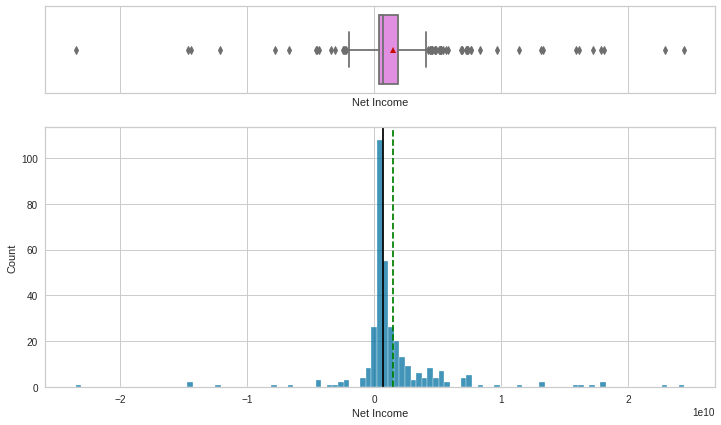

In [ ]:
histogram_boxplot(df, 'Net Income')
print('Sample Mean =',df['Net Income'].mean())
print('Sample Minimum =',df['Net Income'].min())
print('Sample Maximum =',df['Net Income'].max())
plt.show()

**Observations:**
- Net Income data is skewed to right with outliers on left and right sides.

### <font color='darkred'>**Earning Per Share**</font>

Sample Mean = 2.776661764705882
Sample Minimum = -61.2
Sample Maximum = 50.09


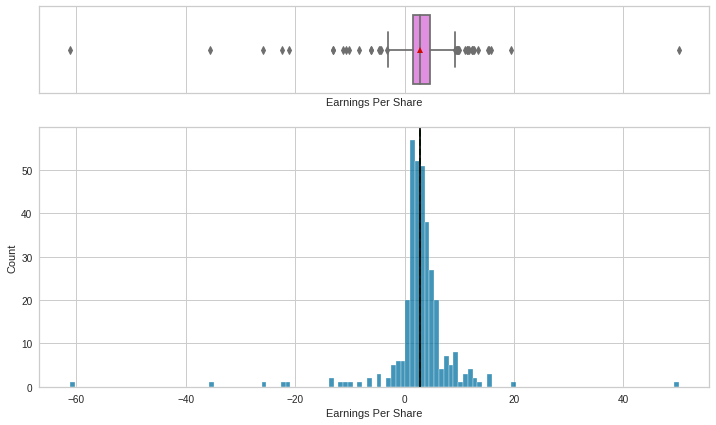

In [ ]:
histogram_boxplot(df, 'Earnings Per Share')
print('Sample Mean =',df['Earnings Per Share'].mean())
print('Sample Minimum =',df['Earnings Per Share'].min())
print('Sample Maximum =',df['Earnings Per Share'].max())
plt.show()

**Observations:**

- Earning per share is normaly distributed with the mean of 2 dollars. There are outliers on both sides: below the minimum of -61 and above the maximum 50 dollars of earning per share.

### <font color='darkred'>**Estimated Shares Outstanding**</font>

Sample Mean = 577028337.7540295
Sample Minimum = 27672156.86
Sample Maximum = 6159292035.0


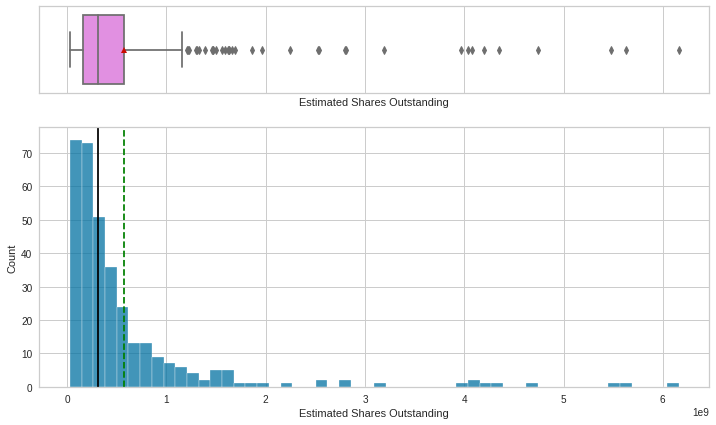

In [ ]:
histogram_boxplot(df, 'Estimated Shares Outstanding')
print('Sample Mean =',df['Estimated Shares Outstanding'].mean())
print('Sample Minimum =',df['Estimated Shares Outstanding'].min())
print('Sample Maximum =',df['Estimated Shares Outstanding'].max())
plt.show()

**Observations:**
- A bit right skewed, Estimated Shares Outstanding has many outliers above the maximum value.

### <font color='darkred'>**P/E Ratio**</font>

Sample Mean = 32.612563318264705
Sample Minimum = 2.935450768
Sample Maximum = 528.0390742


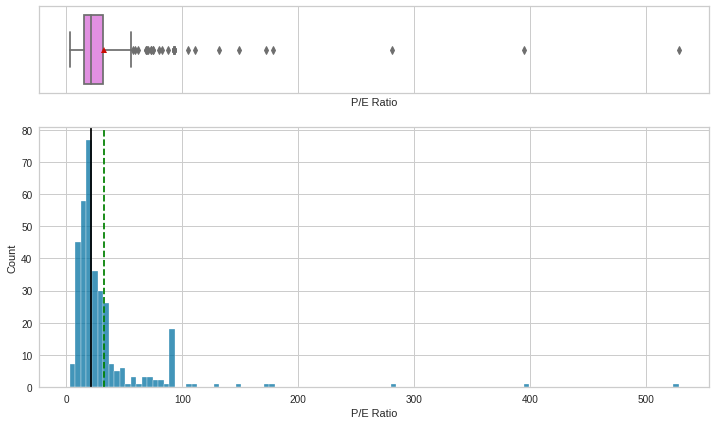

In [ ]:
histogram_boxplot(df, 'P/E Ratio')
print('Sample Mean =',df['P/E Ratio'].mean())
print('Sample Minimum =',df['P/E Ratio'].min())
print('Sample Maximum =',df['P/E Ratio'].max())
plt.show()

**Observations:**

* The P/E ratio is slightly right skwewed with outliers above the maximum level, 528.

In [ ]:
# Let's run the function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='darkred'>**GICS Sector**</font>

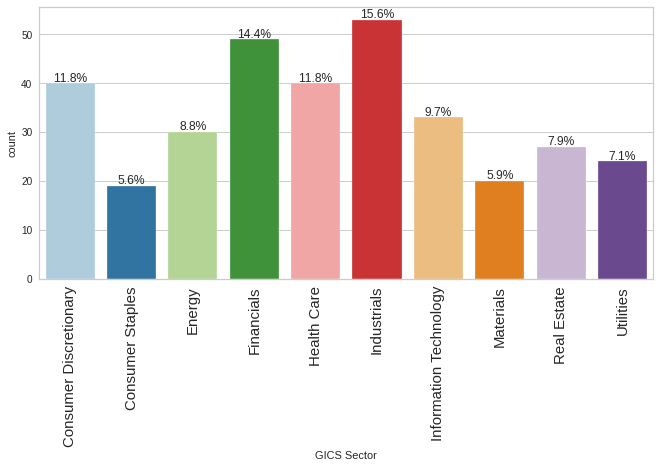

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True, n=10)

**Observations:**
- 15 % of the stocks belong to the Industrials sector.
- Financials is the next sector with most of the stocks, 14.4%
- Consumer Discretionary and Health Care sectors share the third place with 11.8% share for each.
- Consumer Staples has the least share with 5.6%

### <font color='darkred'>**GICS Sub Sector**</font>

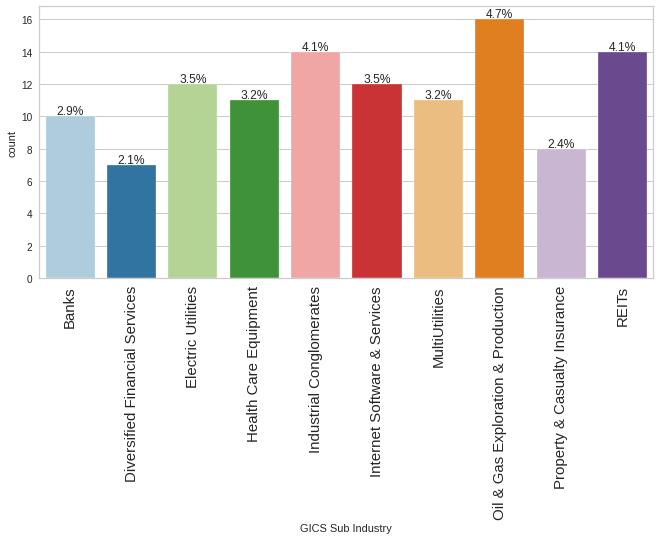

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True, n=10)

**Observations:**
- Oil and Gas Producations Sub Sector (**4.7%**), followed by Industrial Conglomerates (**4.1%**) and REITs (4.1%) are the top three sub sectors.

## **Bivariate Analysis**

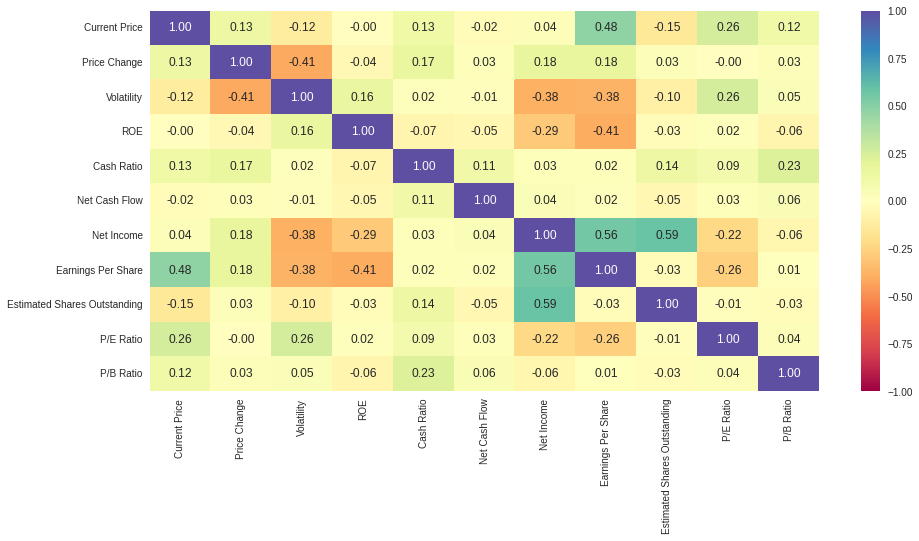

In [ ]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- There are three major correlations that are noticable in the data: Net Income & Estimated Shares Outstanding (**0.59**); Net Income & Earning Per Share (**0.56**); and Current Price and earnings Per Share (**0.48**).
- There is a negative correlation between Price Change and Volatility (**-0.41**) and ROE and Earnings Per Share (**-0.41**). Volatility and Net Income are also negatively correlated (**-0.38**).

### **Let's check the stocks of which economic sector have seen the maximum price increase on average.**

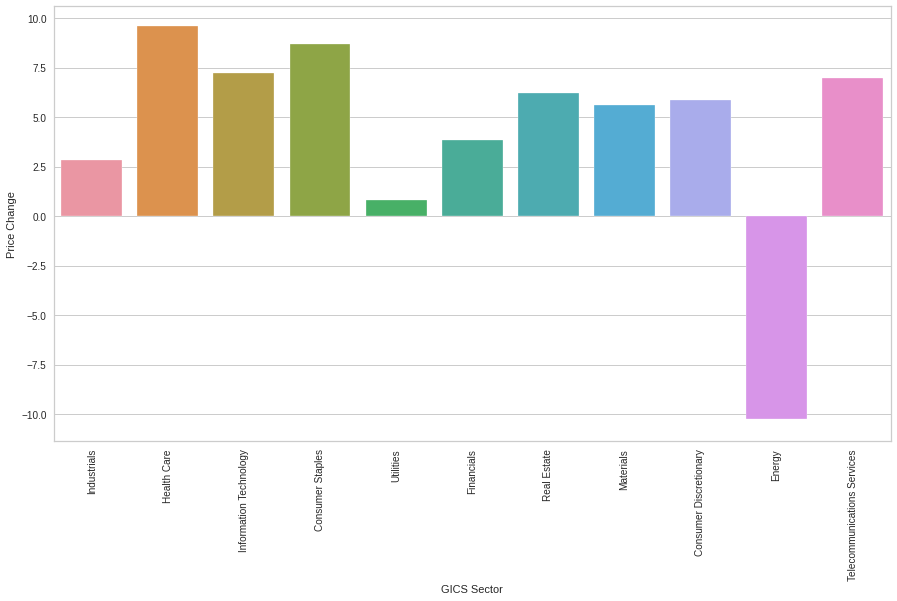

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Health care sector had the maximum price increase (almost 10%) and it is followed by Consumer Staples (around 8%) and Telecommunication Services (around 7%).
- Energy has a negative/decrease in the price, with -10% decrease. 

### **Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

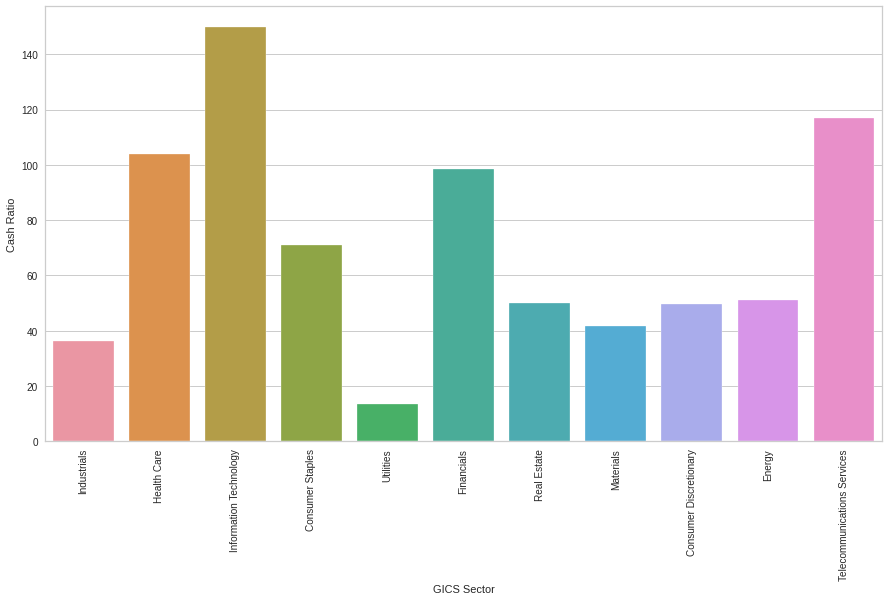

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Observations:**
- Information Technology sector has the highest rate in cash ratio/ability to use cash in short-term obligations.
- Telecommunication Services, Health Care, and Financials  are the next three sectors with high cash ratios.  

### **P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

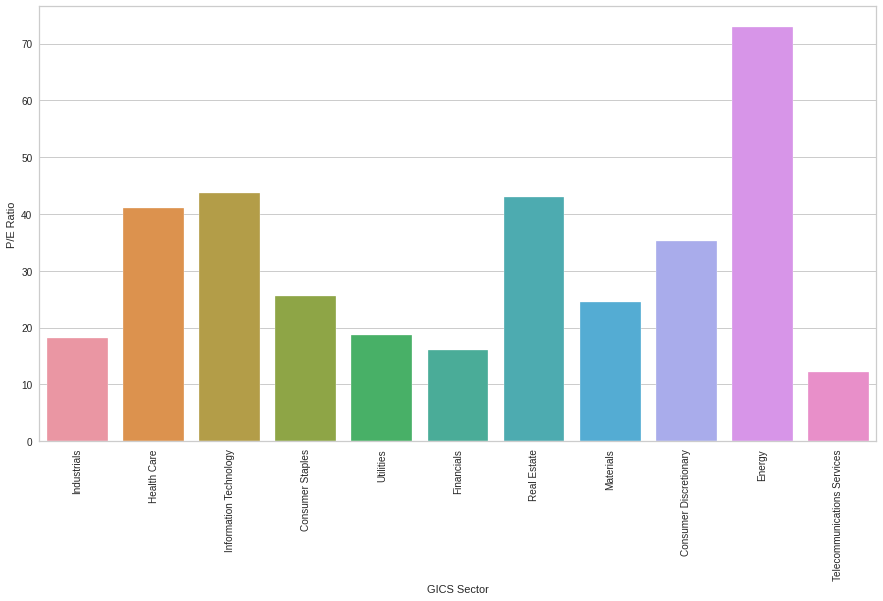

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False) 
plt.xticks(rotation=90)
plt.show()

**Observations:**
- The shares of companies in the **Energy** sector have considerably higher **P/E rations**, meaning the shares of these companies are more valuable in respect to how much money investors are willing to invest in a single share. \
- **Information Technology, Real Estate, and Health Care** are the next three sectors with higher (but not even close to Energy) P/E ratios.

### **Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

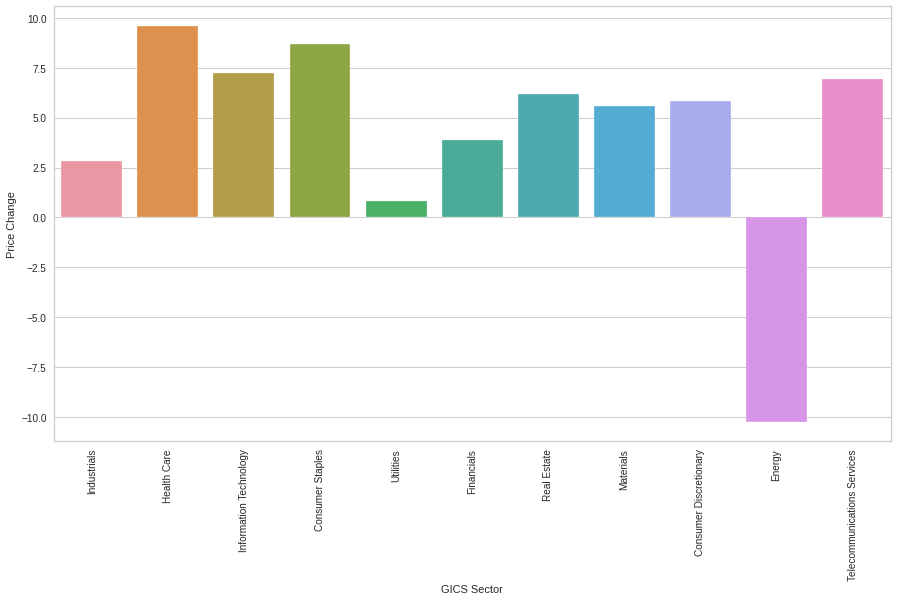

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)  
plt.xticks(rotation=90)
plt.show()

**Observations:**
- **Health Care**, **Consumer Staples**, and **Telecommunication Services** have the highest volatility rates, meaning that the stock prices in this industry fluctuate a lot. This trend was also the same for the average highest price increase.
- **Energy** has the lowest volatility going to the negative numbers. 

# **Data Preprocessing**

---


### <font color='darkred'>**Outlier Check**</font>


- Let's plot the boxplots of all numerical columns to check for outliers.

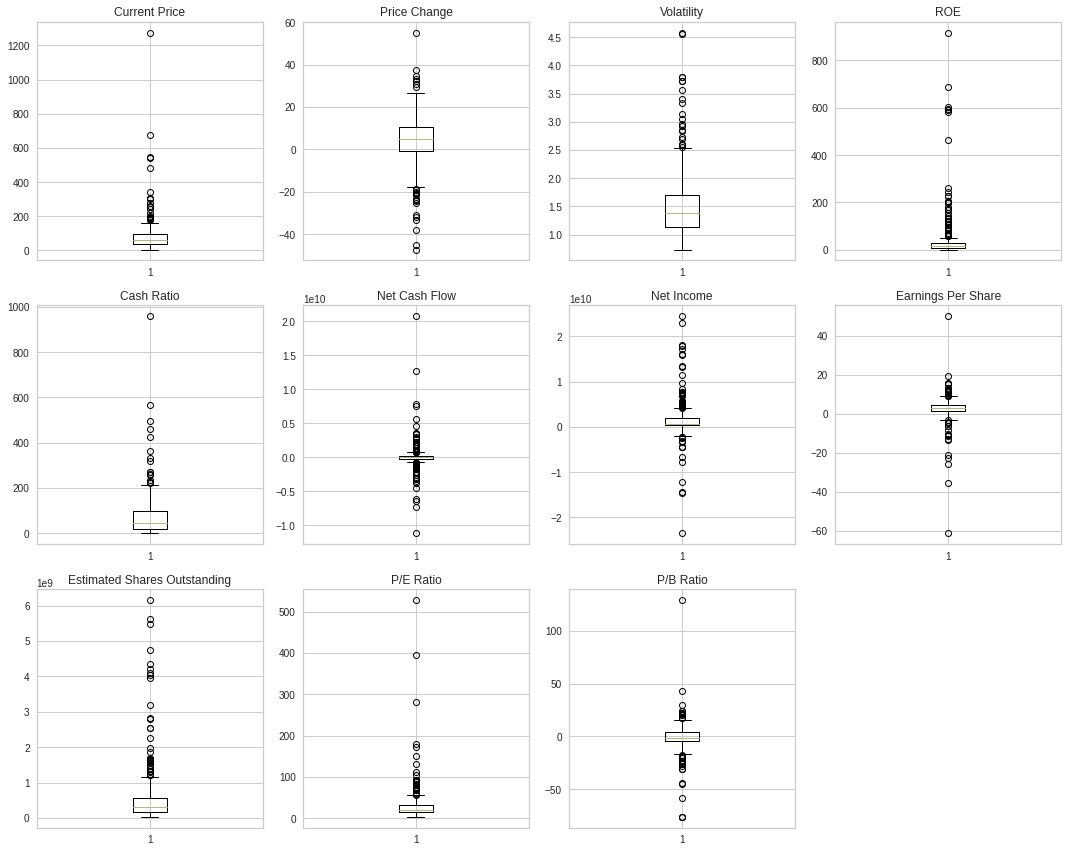

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
- Although there are many outliers in the dataset, we will perform our analysis without treating them. In case they form noticable segments, we may reconsider it. 

### <font color='darkred'>**Scaling**</font>

- Let's scale the data before we proceed with clustering.

In [ ]:
# Since we only scale numeric data, let's pull all the numeric columns first:
numeric_columns

['Current Price',
 'Price Change',
 'Volatility',
 'ROE',
 'Cash Ratio',
 'Net Cash Flow',
 'Net Income',
 'Earnings Per Share',
 'Estimated Shares Outstanding',
 'P/E Ratio',
 'P/B Ratio']

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)


In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


# **K-means Clustering**

---



---


**K-means clustering is one of the common clustering techiques.  We will be deciding on the optimal number of clusters using Elbow Method and Silhouette Scores.**

### <font color='darkred'>**Checking Elbow Plot**</font>

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


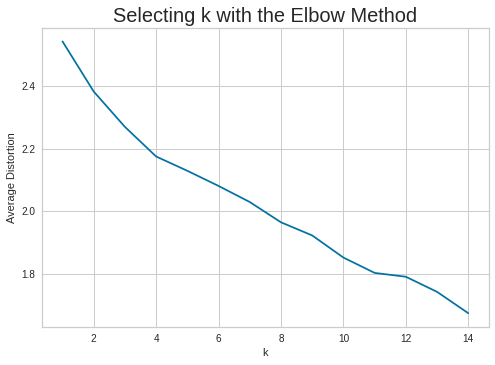

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_means_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

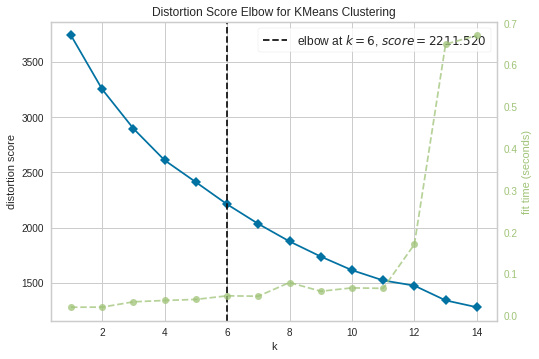

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  
visualizer.show()  

**The appropriate value of k from the elbow curve is 6.**

### <font color='darkred'>**Let's check the silhouette scores**</font>

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


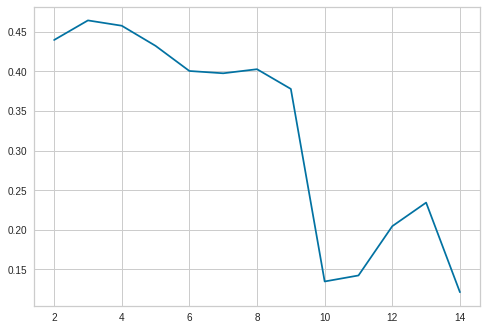

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

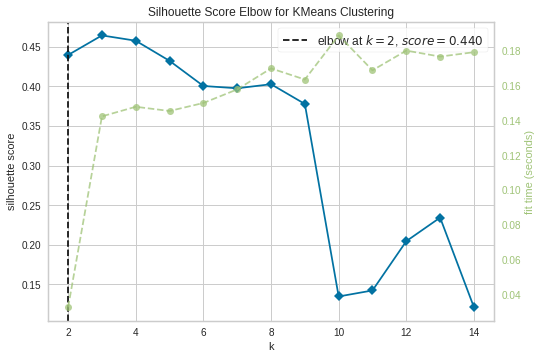

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  
visualizer.show()  

**Let's check different no. of clusters with silhouette coefficients.**

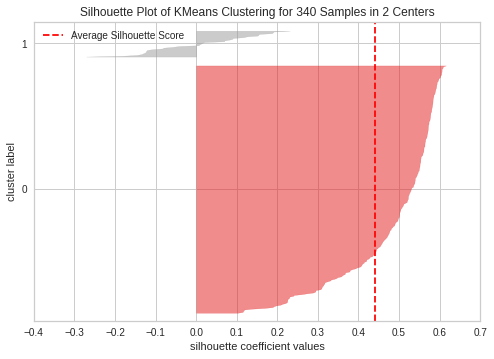

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

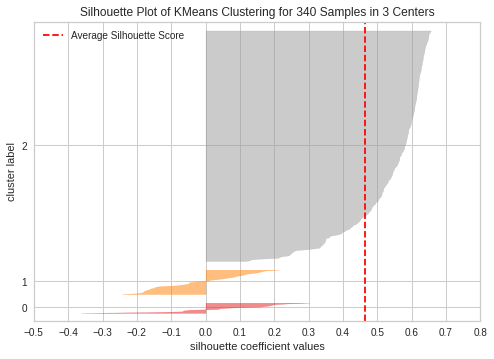

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

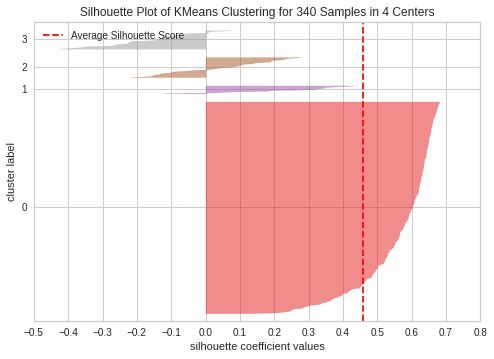

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

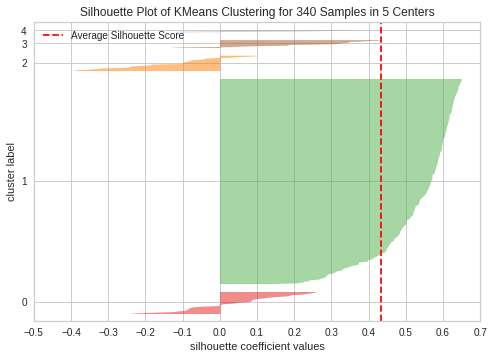

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

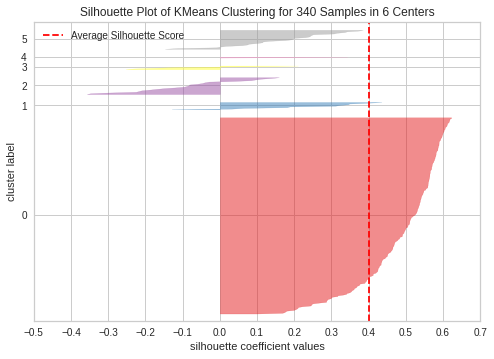

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

****From the silhouette scores, it seems that 2 and 3 give better cluseting options and also good values of k.****

### <font color='darkred'>**Creating Final Model**</font>

**Let's take 3 as the appropriate no. of clusters as the silhouette score is pretty high and there is a visible knick at 3 in the elbow curve. In addition, the cluster groups seem to be better organized - three cluseters have reasonable amount of companies grouped.**

In [ ]:
# Let's take 3 as number of clusters:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=3, random_state=1)

In [ ]:
# Let's create another copy of the original data:
df1 = df.copy()

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_


### <font color='darkred'>**Cluster Profiling**</font>

In [ ]:
# We will groupby the cluster labels:
km_cluster_profile = df1.groupby("KM_segments").mean()  
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values  
)

In [ ]:
# Let's display cluster profiles with the highlighted maximum values:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,54.859231,6.652245,1.156420,27.692308,143.307692,-778461538.461538,13175000000.000000,3.737692,4069172975.384615,21.243297,-3.728598,13
1,61.164139,-12.180491,2.890989,105.827586,55.413793,-105987724.137931,-3592071344.827586,-8.709655,466812861.908276,103.814061,1.821929,29
2,83.913648,5.548124,1.409261,33.671141,68.248322,107639043.624161,1479818234.899329,3.852534,435412124.701443,26.179533,-1.975064,298


In [ ]:
## Let's now print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()




KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     3
             Information Technology          2
             Telecommunications Services     2
1            Consumer Discretionary          2
             Energy                         22
             Industrials                     1
             Information Technology          3
             Materials                       1
2            Consumer Discretionary         37
             Consumer Staples               18
             Energy                          7
             Financials                     46
             Health Care                    37
             Industrials                    52
             Information Technology         28
             Materials                      19
             Real E

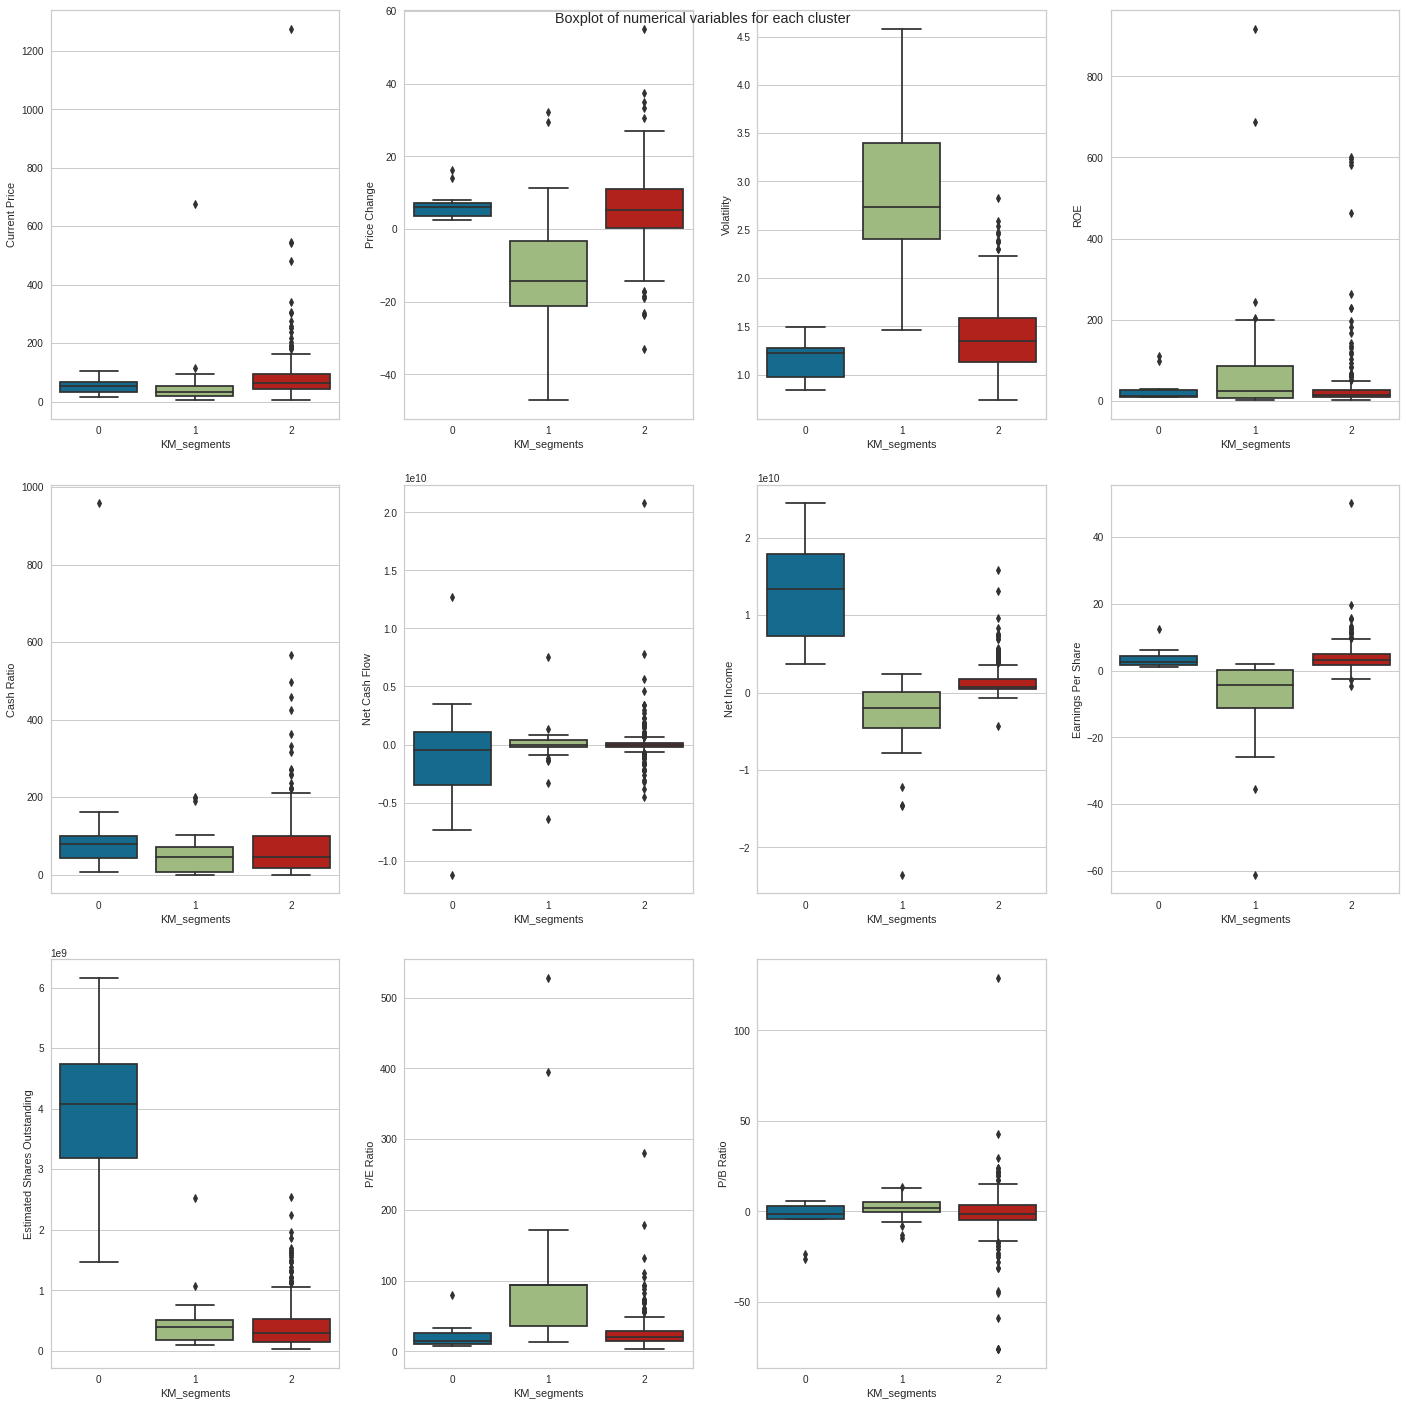

In [ ]:
# Let's build the boxplots:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

# **Insights:**

- **Cluster 0:**
 - There are 14 companies in this cluster
 - The current price is low.
 - The price change is high.
 - The volatility is low.
 - The cash ratio is very high.
 - The ROE is low.
 - The net cash flow is very high.
 - The net income is very high.
 - The earnings per share considerably high.
 - The estimated shares outstanding is very high.
 - The P/E ratio is  low.
 - The P/B ratio is  low.

- **Cluster 1:**
 - There are 32 companies in this cluster.
 - The price change is on negative 
 - The current price is considerably low.
 - The volatility is moderatily high.
 - The ROE is very high.
 - The cash ratio is low.
 - The net cash flow is moderate.
 - The net income is on negative/very low.
 - Earnings per share is on negative/very low.
 - The estimated shares outstanding is considerably low.
 - The P/E ratio is very, very high. 
 - The P/B ration is high.

- **Cluster 2:** 
 - There are 294 companies in this cluster.
 - The current prices are very high.
 - The price change is moderately high.
 - The cash ration is low.
 - The net cash flow is also low.
 - The net income is considerably low, but not on the negative.
 - The earning per share is high.
 - The estimated shares outstanding is low.
 - The P/E ratio is considerably low.
 - The P/B ratio is considerably low.
 

# **Hierarchical Clustering**

---



---



### <font color='darkred'>**Computing Cophenetic Correlation**</font>


In [ ]:
# Let's create a copy before we proceed:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] 
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] 

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Observations**

- We see that the cophenetic correlation is maximum with **Euclidean distance** and **average linkage**: 0.9422.
- The cophenetic correlations with **Chebyshev distance** and **average linkage**; 0.9338 and **Cityblock (Manhattan)** distance and **single linkage**: 0.9334 are also pretty high and need to be looked further.

**Let's view the dendrograms for the different linkage methods with Euclidean distance first.**

## <font color='darkred'>**Checking Dendrograms**</font>

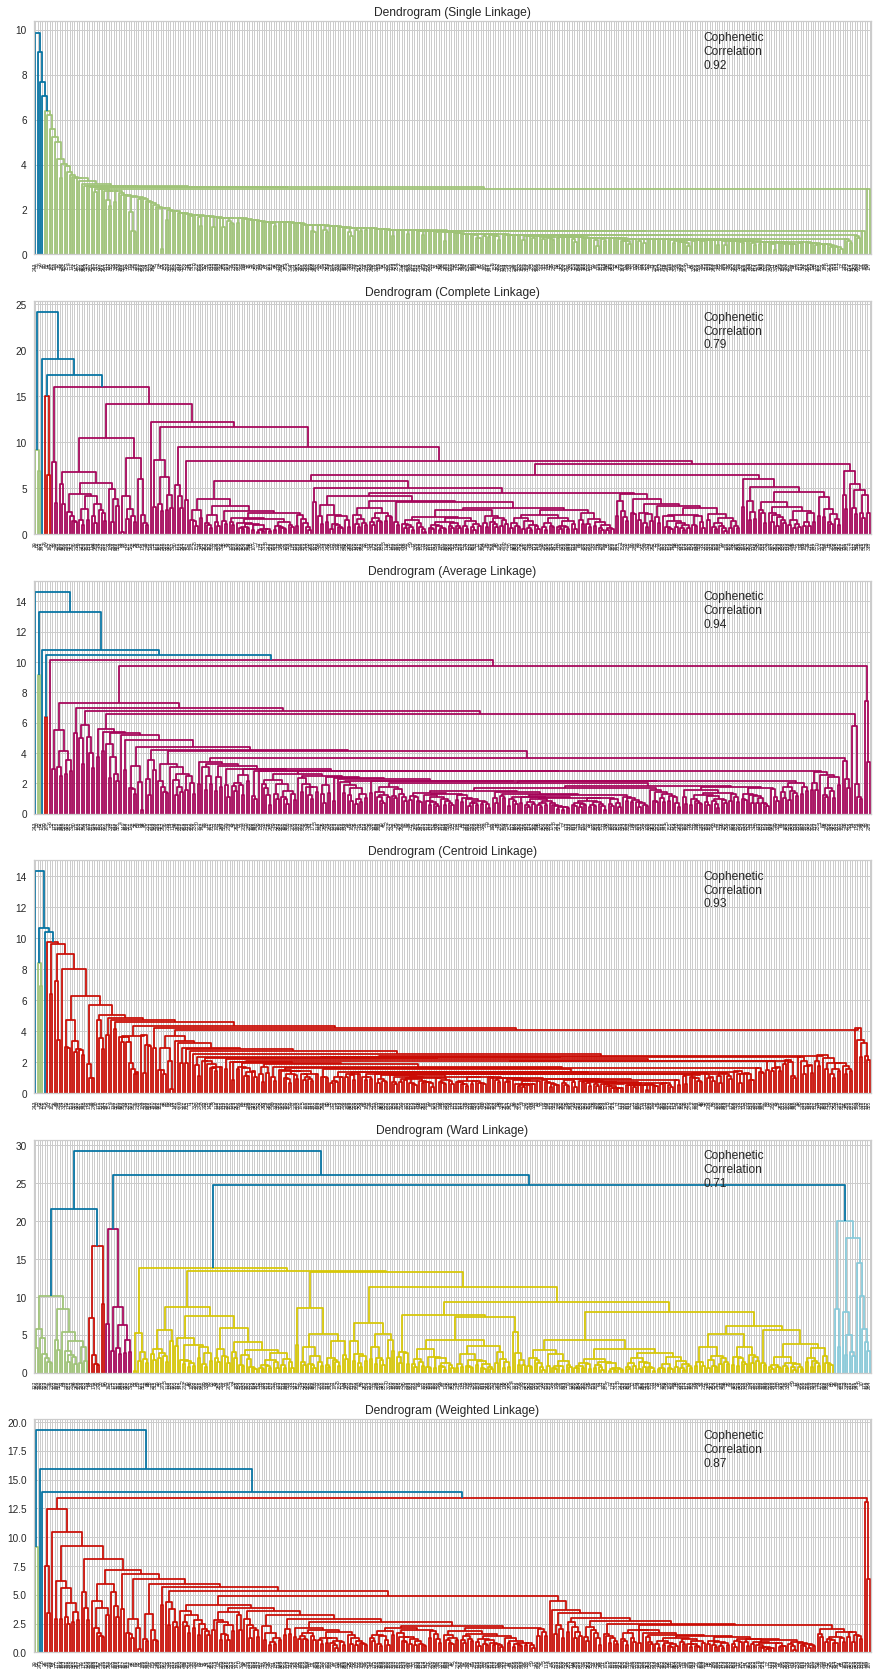

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations:**
- The Ward linkage seems to be more distinct, but it's cophenetic coefficient is pretty low.Other linkages, other than Single linkage, seem to have pretty similar dendograms.

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


**Observations:**
- The cophenetic correlation is highest for **Average** and **Centroid** linkage methods.
 

**Let's see the dendrogram for Chebyshev and Cityblock/Manhattan distances with average and single linkage methods (as they gave high cophenetic correlation values).**

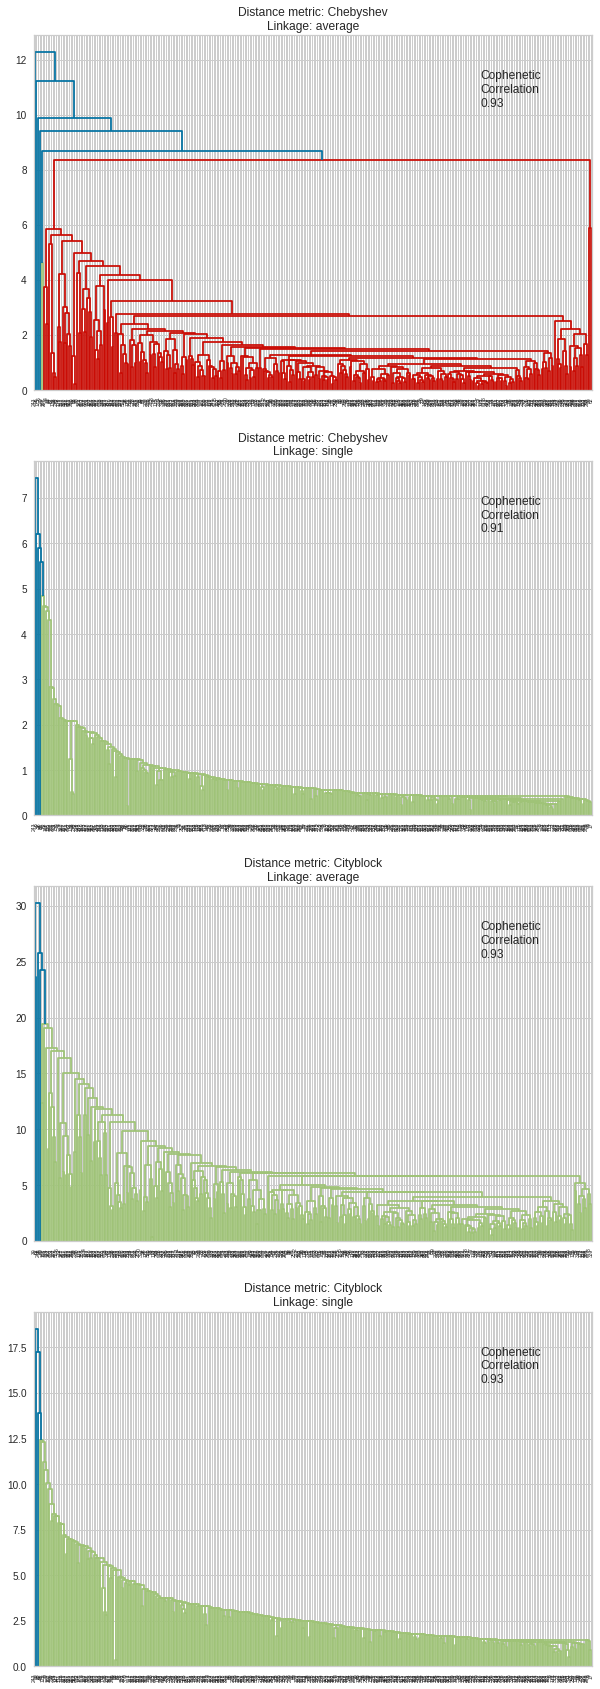

In [ ]:
# list of distance metrics
distance_metrics = ["chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "single"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations:**
- The dendrograms from the Chebyshev and Cityblock distances are not as distinct and clear as from Euclidean.
- Out of all the dendrograms we saw, it is clear that the dendrogram with Euclidean distance and average linkage gave us better clusters.
- 5 would be the appropriate number of the clusters from the dendrogram with Average linkage method.Z

## <font color='darkred'>**Creating model using sklearn**</font>

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

## <font color='darkred'>**Cluster Profiling**</font>

In [ ]:
# Let's group the clusters:
hc_cluster_profile = df2.groupby("HC_segments").mean() 

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  
)

In [ ]:
# Let's look into the cluster profiles with highlights on maximum values:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
Name: Security, dtype: int64

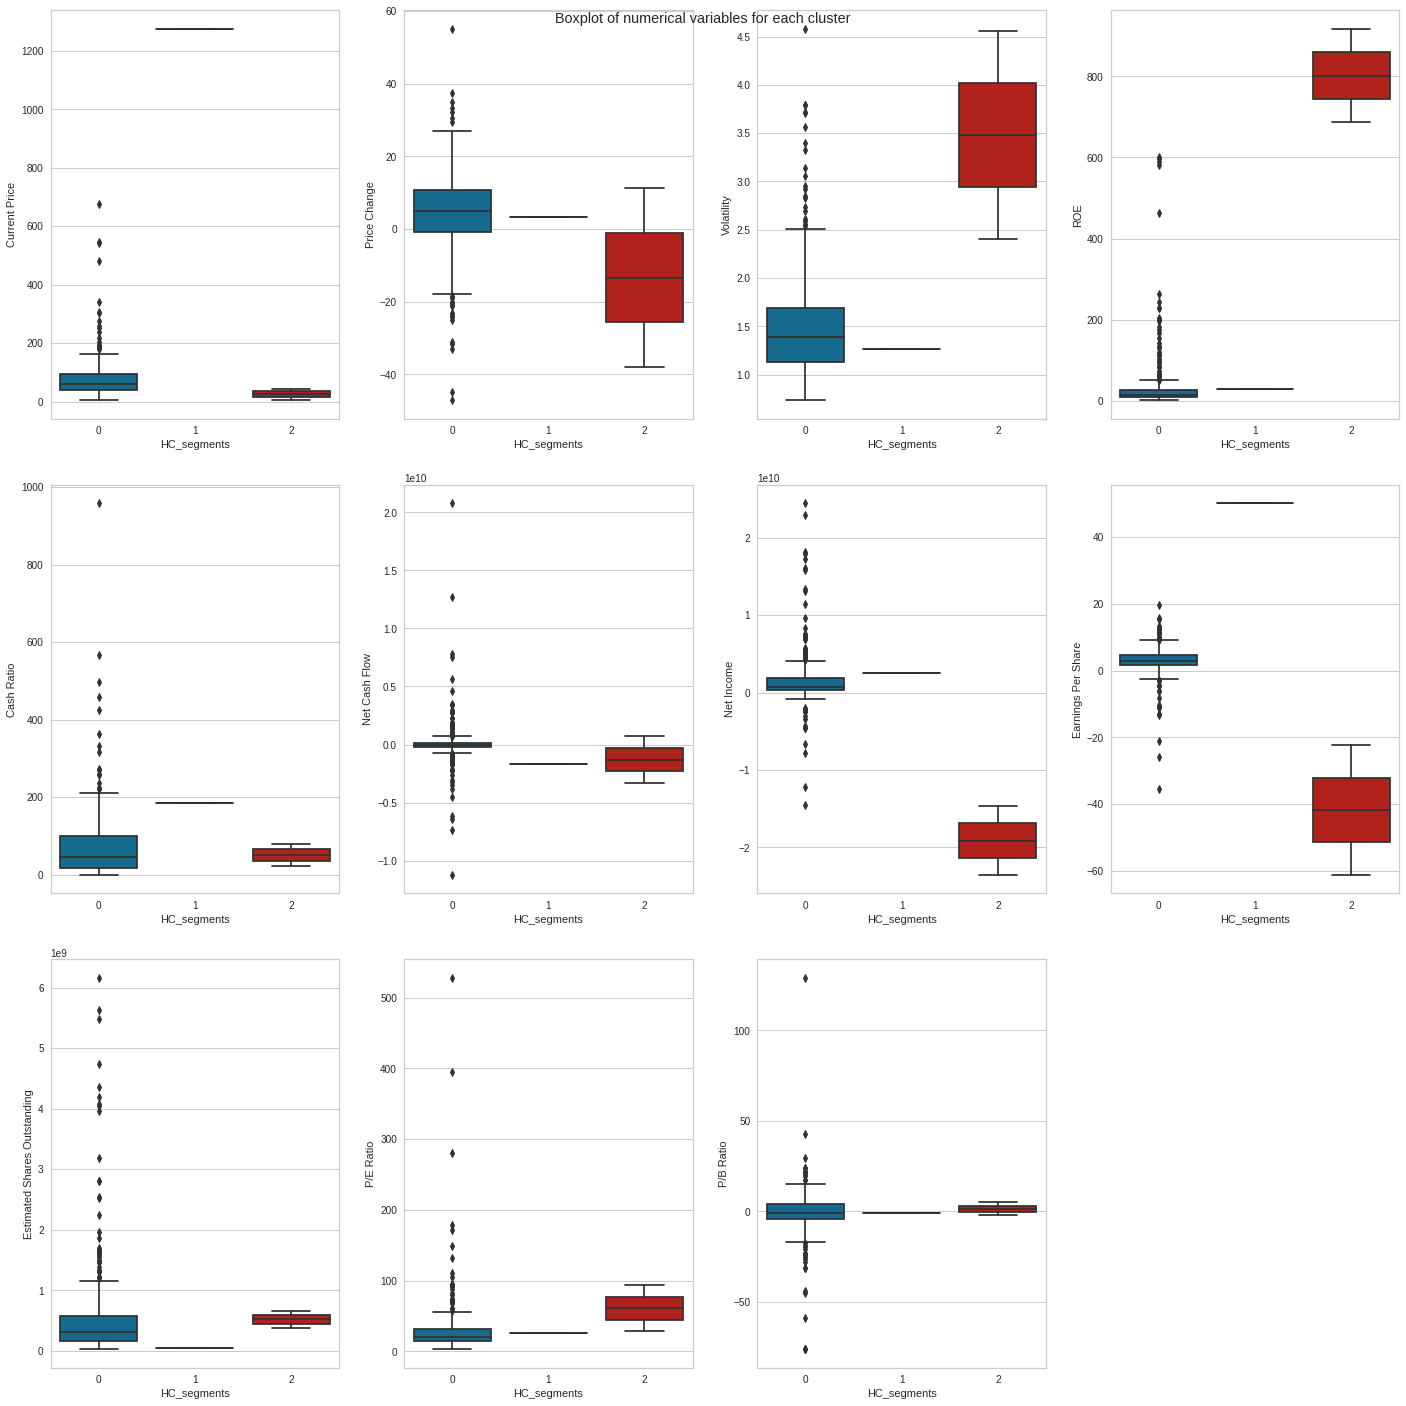

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Observations:**

Regardless of having tried different cluster numbers (2,3,4,5,6,8), the clusters form very disproportianally, with one cluster holding more than 330 companies, and others holding 1 or 2 companies only. Choosing 3 cluster numbers was an optimal solution. 
- **Cluster 0:**
  - There are 337 companies in the cluster.
  - Stocks in this clusters have a moderate current price.
  - The Price Change is high.
  - The Volatility is low and the ROE is moderate.
  - The Net Cash Flow for these companies is very high, and the Net Income is also pretty high. 
  - There is a positive Earning Per Share, and the Estimated Shares Outstanding is high.
  - The P/E Ratio is moderate; The P/B is low.

- **Cluster 1:**
 - There is only 1 company in this cluster and it seems to be an outlier.
 - The current price of the company is very, very high and the price change is also pretty high. 
 - Cash Ratio on almost tripe higher than other two clusters.
 - The Net Cash Flow is very much below negative, and the Net Income and Earning Per Share is very high.
 
- **Cluster 2:**
 - There are 2 companies in this cluster.
 - The Current Price is low, and the Price Change is on negative values. 
 - The ROE and Volatility for the shares are very high.
 - The Net Cash Flow and Net Income, and Earnings Per Share are on very low negative values. 
 - The cluster has high P/E Ratio and P/B Ratio rates.

# <font color='darkred'>**Dimensionality Reduction using PCA for vizualization**</font> 

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [ ]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [ ]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.3712899567725855

**Observations:**
- The first two components explain 37% of the varience in the data.

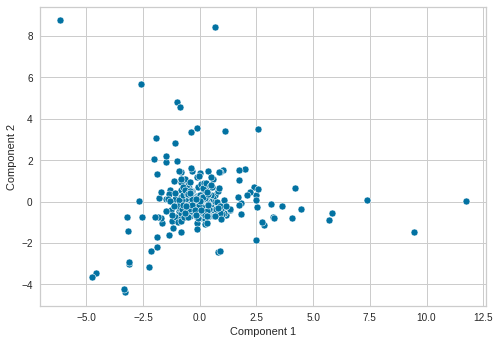

In [ ]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

**Observations:**
- From the overall picture, we can see that there is an overall cluster/cloud of the variable and some spreads around it. We could split the cloud into 2 or 4 clusters if we draw horizontal line from the middle, or split the cloud into 4 groups. 

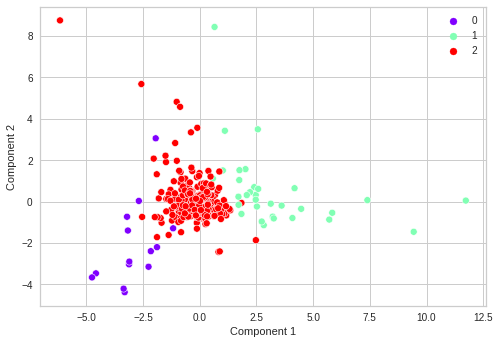

In [ ]:
#Let's look into the PCA for K-means clusters:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["KM_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

**Observations:**
- There are 3 clusters, with the Cluster 2 being the largest one. The clusters seem to have major grouping components that can help in analyzing the data.

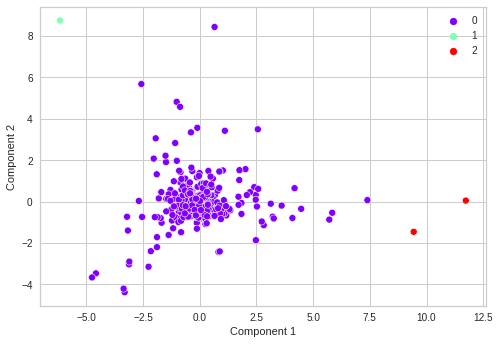

In [ ]:
# Let's look into the PCA scatterplot for the Hierarchical Clustering groups:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

**Observations:**
- Cluster 0 is the major clusters.
- The rest of the data points seem to be mostly outliers.

In [ ]:
%%shell
jupyter nbconvert --to html //content/Full_Code_Project_5_MO.ipynb

[NbConvertApp] Converting notebook //content/Full_Code_Project_5_MO.ipynb to html
[NbConvertApp] Writing 1604712 bytes to //content/Full_Code_Project_5_MO.html


# **K-means vs Hierarchical Clustering**

---



- **K-means** clustering technique took less time for execution. Elbow and Silhouette Score methods were easier to interpret and analyze in choosing the cluster numbers. While choosing the most optimal Cophenetic Coefficient in **Hierarchical Clustering** technique was straightforward, interpretation of dendrograms with different linkage and distances was time-consuming.
- **K-means** gave more distinct and balanced clusters than the **Hierarchical method**.
- In total, K-means gave 13 options of clusters from 2 to 14. It was comparably easier to observe the cluster differences by their average distortion values. There were 16 different distance options in the Hierarchical technique. It required more manual consideration for choosing the most optimal number of clusters.
- Both algorithms gave 11 observations within the clusters.
- The optimal number of clusters for both algorithms was identified as 3 clusters.K-means clusters were more balanced with the ratio of **14-32-294**. Hierarchical clusters had the ratio of **337-1-2**.
- The biggest cluster in the **K-means** has the highest current price and earnings per share. The biggest cluster in the Hierarchical technique has the highest average price change, net cash flow, and estimated shares outstanding. So the cluster profiles are not very similar.
- **Based on the comparison analysis of the two algorithms, the clusters from K-means technique will give us better observations for actionable insights and recommendations.**


# **Actionable Insights and Recommendations**

---


### **Summary**
- It is important to maintain a diverse portfolio when investing in stocks in order to minimize the risks of potential losses when the market is down for certain shares. Grouping the stocks by similar characteristics and analyzing the clusters across different market segments can protect against losses and risks.
- We have analyzed some financial indicators for a few companies listed under the New York Stock Exchange and grouped the stocks using the K-means clustering algorithm. 

### **Insights**

- Industrials sector with Oil and Gas Exploration is the top sector.
- The highest correlation exists between Net Income and Estimated Shares Outstanding. ROE and Earnings Per Share are not correlated.
- Health care sector had the maximum price increase in 13 weeks, while Energy sector had 10% decrease.
- Information Technology and Telecommunication Services industries had the highest cash ratios to cover short-term obligations.
- Energy sector has the highest P/E ratio, meaning that its shares are very valuable, especially in the longterm. Telecommunications Services have the lowest P/E ratios.
- With Volatility being on the negative values, Energy sector is the safest sector to invest.Health Care and Consumer Staples are the highest volatility sectors - have sharper price changes.

- Based on the algorithm calculations, the companies can be clustered into 3 groups:
  - **Cluster 2** consists of the largest group of 294 companies that have higher current prices. There is an average of 5% of price change in the stock prices. Net Income and Net Cash Flow of these companies is moderate, while the Earning Per Share is high. These companies have lower Cash Rations from other clusters. 
  - **Cluster 1:** consists of 32 companies. While the Current Price of these companies is moderate, the Price Change in 13 weeks was negative. This group has very high ROE - strong financial performance - companies with a moderate Cash Ratio and Net Cash Flow. Net Income and Earning Per Share for this group was on negative values. The companies current stock price to the earning per share ratio is very high.
  - **Cluster 0:** consists of 14 companies. The distinct features of this group is the lowest Current Price with high rate of Price Change in 13 weeks. While the ROE is very low, there companies have very high Cash Ratio, Net Cash Flow, and Net Income rates. Estimated Shares Outstanding rate is also very high. Important to note that the P/B value for this group is very low.

### **Recommendations:**   

- Companies in **Cluster 0** seem to be taking advantage from a state of economy, as with low ROE and price fluctuations, these companies are bringing unusually high cash flows and income. It is recommended to make short-term investments to these companies to benefit from the current situation. The low P/E values for these companies suggest that they are performing surprisingly well compared to their past.
- There are 32 companies in **Cluster 1** and they actually worth their stock price (P/B Ratio) and have very stable (no price change in 13 weeks) and high financial performance (ROE). The P/E of these companies is very, very high, meaning that the investors could expect much higher earnings in the future, Although these companies are giving a loss to the investment (-7 Earning Per Share) and Net Income, having a long-term investment in these stocks could be more beneficial than in the current market state.
- Investing in **Cluster 2** companies will bring the higher earnings per share, but the current price of the stocks has the negative ratio to their book values. These companies could also be benefitting from a current economic state, so considering them for a short-term investment could be a good choice. 

In [ ]:
%%shell
jupyter nbconvert --to html /content/Full_Code_Project_7_MO.ipynb

[NbConvertApp] Converting notebook /content/Full_Code_Project_7_MO.ipynb to html
[NbConvertApp] Writing 2191855 bytes to /content/Full_Code_Project_7_MO.html
